In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp



In [3]:
datapath = "~/teigen_data/output_rows.csv"

In [63]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [66]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())
df

# df

Index([u'datetime', u'note', u'length [mm]', u'volume [mm^3]',
       u'surface [mm^2]', u'area volume [mm^3]', u'count []',
       u'numeric volume [mm^3]', u'numeric surface [mm^2]',
       u'length d. [mm^-2]', u'volume d. []', u'surface d. [mm^-1]',
       u'appearance show_surface', u'areasampling areasize_mm',
       u'areasampling areasize_px', u'areasampling voxelsize_mm',
       u'filepattern', u'generator_id',
       u'generators Cylinder continues element_number',
       u'generators Cylinder continues fixed_radius_distribution',
       u'generators Cylinder continues intensity_profile_intensity',
       u'generators Cylinder continues intensity_profile_radius',
       u'generators Cylinder continues normal_radius_distribution',
       u'generators Cylinder continues radius_distribution_maximum',
       u'generators Cylinder continues radius_distribution_mean',
       u'generators Cylinder continues radius_distribution_minimum',
       u'generators Cylinder continues radius_

,datetime,note,length [mm],volume [mm^3],surface [mm^2],area volume [mm^3],count [],numeric volume [mm^3],numeric surface [mm^2],length d. [mm^-2],...,postprocessing measurement_multiplier,postprocessing measurement_resolution,postprocessing negative,postprocessing noise_amplitude,postprocessing noise_mean,postprocessing noise_preview,postprocessing noise_random_generator_seed,postprocessing output_dtype,postprocessing surface_measurement,required_teigen_version
0,2017-04-19T14:37:40.861429,NaN,256.826885,53205.891456,19378.441193,1716000,20,52204.225268,19247.270565,0.000150,...,-1,20,False,40,30,False,0,uint8,False,0.2.17
1,2017-04-19T14:38:42.234488,NaN,256.826885,53205.891456,19378.441193,1716000,20,52204.225268,19247.270565,0.000150,...,-1,20,False,40,30,False,0,uint8,False,0.2.17
2,2017-04-19T14:42:07.946006,NaN,256.826885,53205.891456,19378.441193,1716000,20,49301.353161,18851.813858,0.000150,...,-1,10,False,40,30,False,0,uint8,False,0.2.17
3,2017-04-19T14:51:59.992722,NaN,256.826885,53205.891456,19378.441193,1716000,20,38396.893652,17354.768357,0.000150,...,-1,5,False,40,30,False,0,uint8,False,0.2.17
4,2017-04-19T14:52:25.621267,NaN,256.826885,53205.891456,19378.441193,1716000,20,45353.047764,18333.728391,0.000150,...,-1,7,False,40,30,False,0,uint8,False,0.2.17
5,2017-04-19T14:52:56.225398,NaN,256.826885,53205.891456,19378.441193,1716000,20,50855.319545,19065.435560,0.000150,...,-1,13,False,40,30,False,0,uint8,False,0.2.17
6,2017-04-19T14:53:46.240126,NaN,256.826885,53205.891456,19378.441193,1716000,20,51894.565555,19198.017152,0.000150,...,-1,17,False,40,30,False,0,uint8,False,0.2.17
7,2017-04-19T15:08:04.033962,NaN,256.826885,53205.891456,19378.441193,1716000,20,42625.438685,17931.361104,0.000150,...,-1,6,False,40,30,False,0,uint8,False,0.2.17
8,2017-04-19T15:08:44.441612,NaN,256.826885,53205.891456,19378.441193,1716000,20,47153.074573,18534.526112,0.000150,...,-1,8,False,40,30,False,0,uint8,False,0.2.17
9,2017-04-19T15:09:05.002401,NaN,256.826885,53205.891456,19378.441193,1716000,20,48547.146188,18744.077589,0.000150,...,-1,9,False,40,30,False,0,uint8,False,0.2.17


# Numeric measurement precision (element_numer = 20, length_mean = 15)

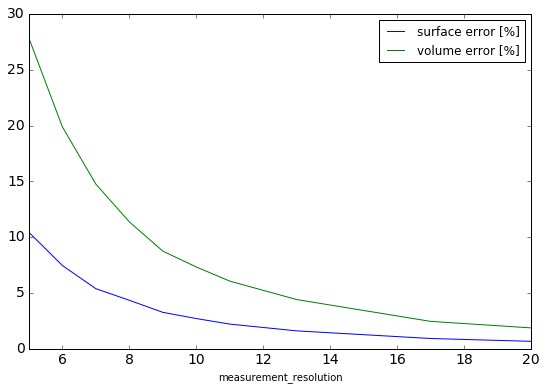

In [62]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["generators Unconnected cylinders length_distribution_mean"] == 15
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort("measurement_resolution").plot(
    x="measurement_resolution", **plotkw)

In [ ]:
## element_number = 10, 

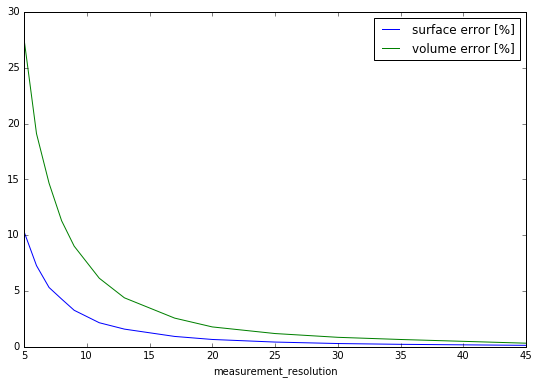

In [65]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["generators Unconnected cylinders length_distribution_mean"] == 17
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort("measurement_resolution").plot(
    x="measurement_resolution", **plotkw)